# 1. Passive learning sans politique aléatoire

Nous initions le facteur de réduction $\gamma = 0,95$ (proche de 1) dû au fait que nous considérons que les futures récompenses sont très importantes. Cependant, nous n'initialisons pas $\gamma = 1$ car nous voulons pénalisé les états qui sont loins de la solution.

In [4]:
from environment import SimpleMaze
from agent import PassiveAgentTD

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

0  |.|.|.|.|.|.|.|.|.|.|.|E|
1  |.|.|.|.|.|.|.|.|.|.|.|.|
2  |.|.|.|.|.|.|.|.|.|.|.|.|
3  |.|.|.|.|.|.|.|.|.|.|.|.|
4  |.|.|.|.|.|.|.|.|.|.|.|.|
5  |.|.|.|.|.|.|.|.|.|.|.|.|
6  |C|.|.|.|.|.|.|.|.|.|.|.|



### Nous affichons l'évolution de l'utilité de chaque état : 

In [5]:
agent = PassiveAgentTD(env, gamma=0.95, debug=False)
agent.learning(trials=100)

learning completed


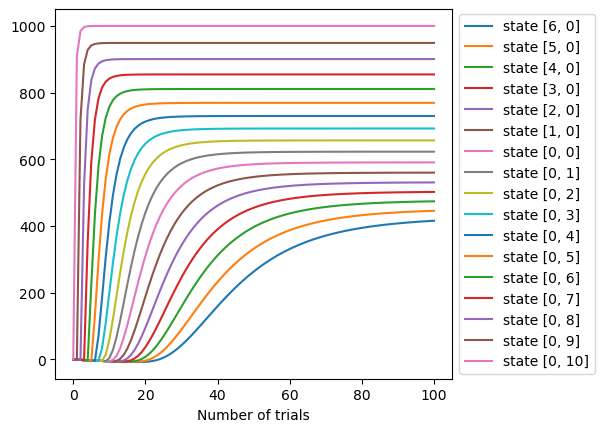

In [6]:
import matplotlib.pyplot as plt
utilities = agent.get_utilities()
visited_states = agent.get_visited_state()

fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(visited_states)):
    plt.plot(utilities[i], label="state "+str(visited_states[i]))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Number of trials")
plt.show()

### Nous affichons l'utilité finale pour chaque état où passe notre agent

In [7]:
states = agent.get_visited_state()
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        if [i, j] in states:
            print("{:<8}".format(str(round(utilities[states.index([i, j])][-1], 2))), end=" ")
        else:
            print("{:<8}".format(""), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  590.64   622.83   656.68   692.3    729.79   769.26   810.8    854.52   900.55   949.0    1000.0            
1  559.94                                                                                                      
2  530.53                                                                                                      
3  502.05                                                                                                      
4  473.94                                                                                                      
5  445.44                                                                                                      
6  415.6                                                                                                       


# 2. Passive learning avec politique aléatoire

In [8]:
from environment import SimpleMaze
from agent import PassiveAgentTD

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

0  |.|.|.|.|.|.|.|.|.|.|.|E|
1  |.|.|.|.|.|.|.|.|.|.|.|.|
2  |.|.|.|.|.|.|.|.|.|.|.|.|
3  |.|.|.|.|.|.|.|.|.|.|.|.|
4  |.|.|.|.|.|.|.|.|.|.|.|.|
5  |.|.|.|.|.|.|.|.|.|.|.|.|
6  |C|.|.|.|.|.|.|.|.|.|.|.|



In [9]:
agent = PassiveAgentTD(env, seed=0, gamma=0.95, random_policy=True, debug=False)
agent.learning(trials=500)

learning completed


### Nous affichons l'évolution de l'utilité de chaque état : 

In [10]:
states = agent.get_visited_state()
utilities = agent.get_utilities()
print("   ", end="")
for i in range(col):
    print("{:<8}".format(str(i)), end=" ")
print()
for i in range(row):
    print("{:<2}".format(str(i)), end=" ")
    for j in range(col):
        if [i, j] in states:
            print("{:<8}".format(str(round(utilities[states.index([i, j])][-1], 2))), end=" ")
        else:
            print("{:<8}".format(""), end=" ")
    print()

   0        1        2        3        4        5        6        7        8        9        10       11       
0  15.04    33.73    53.58    68.8     88.22    106.77   162.13   216.28   260.02   374.1    655.01   0        
1  5.78     16.66    38.68    51.95    67.73    77.95    104.15   159.88   210.55   258.03   350.76   300.56   
2  5.37     10.92    35.56    52.12    64.32    68.64    90.27    136.4    181.59   181.95   189.69   95.96    
3  4.5      10.46    20.44    40.76    58.24    60.12    83.77    121.07   104.35   136.79   120.65   71.89    
4  2.74     7.15     8.84     10.06    36.31    39.13    44.64    32.05    44.04    55.4     42.6     41.45    
5  2.71     5.13     5.11     5.94     10.19    10.82             24.59    30.33    42.09    31.41    23.7     
6  1.59     2.18     1.65     5.38     8.64     7.92              18.52    21.77    37.36    24.26    20.67    


# 3. Active learning avec l'utilisation de la Q-function

In [11]:
from environment import Maze
from agent import ActiveAgentQLearning

row, col = 10, 12

env = Maze(row, col, seed=2, ratio_obstacles=0.2,ratio_hole=0.2)
env.canvasInterface.print_canvas()
env.render("gui")

Canvas(height=480, width=576)

In [12]:
agent = ActiveAgentQLearning(env, q_min=1400, n_min=60, gamma=1, debug=False)
agent.learning(trials=100)

 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.0% 
learning completed


### Affichage de la solution que l'agent choisit après son apprentissage

In [13]:
agent.play("gui")

Partie terminée


# 3. Régression Linéaire

In [14]:
from environment import Maze
from agent import ActiveAgentRegressionLearning

row, col = 10, 12

env = Maze(row, col, seed=2, ratio_obstacles=0.2,ratio_hole=0.2)
env.canvasInterface.print_canvas()
env.render("gui")

Canvas(height=480, width=576)

In [15]:
agent = ActiveAgentRegressionLearning(env, q_min=20000, n_min=2000, gamma=1, debug=False)
agent.learning(trials=100)

 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.0% 
learning completed


L'apprentissage ne se passe pas comme prévu, en effet, nous rencontrons un problème avec l'apprentissage de $Q_\beta(s,a)$. Cela aura pour effet de calculer des valeurs de $Q_\beta(s,a)$ proche de la réalité par conséquent l'agent va se coincer dans une boucle d'état.

### Affichage de la solution que l'agent choisit après son apprentissage

In [16]:
agent.play("gui")

Partie terminée
